# Homework 1

## Problem 2 (The Numerical Square Root Finding Algorithm)
The goal of this problem is to give you a taste of iterative numerical conversion. The square root $\sqrt{a}$ for most positive real numbers $a$ are irrational numbers and is not easy to calculate. Since 1,500 BC, ancient Babylonians have been using the following iterative method to find square roots. The method works as follows:

Assume $x^{(0)}$ is the initial solution, say some random positive number. 

We then iteratively calculate the following sequence of solutions $x^{(1)},x^{(2)},\dots$, where each solution:
\begin{equation}
    x^{(j+1)}=\frac{1}{2}(x^{(j)}+\frac{a}{x^{(j)}})
\end{equation}
for $j=0,1,\dots$

### Part 1
Implement the above simple root finding algorithm using your favorite programming language (e.g., python, MATLAB, C, Java, etc.) and see if the algorithm works with some examples and compare the results from a calculator.

In [3]:
import math

def babylonian_sqrt(a, x0=1.0, tolerance=1e-10, 
                   max_iterations=100):
    x = x0
    for j in range(max_iterations):
        x_next = 0.5 * (x + a / x)
        if abs(x_next - x) < tolerance:
            return x_next, j + 1
        x = x_next
    return x, max_iterations

# Test cases comparing Babylonian method 
# with calculator
test_cases = [2, 3, 5, 10, 25, 50, 100]

print(f"{'Number':<8} {'Babylonian':<15} "
      f"{'Calculator':<15} {'Error':<12} "
      f"{'Iterations'}")
print("-" * 60)

for a in test_cases:
    result, iters = babylonian_sqrt(a)
    actual = math.sqrt(a)
    error = abs(result - actual)
    print(f"{a:<8} {result:<15.8f} "
          f"{actual:<15.8f} {error:<12.2e} "
          f"{iters}")

Number   Babylonian      Calculator      Error        Iterations
------------------------------------------------------------
2        1.41421356      1.41421356      2.22e-16     5
3        1.73205081      1.73205081      0.00e+00     6
5        2.23606798      2.23606798      0.00e+00     6
10       3.16227766      3.16227766      4.44e-16     7
25       5.00000000      5.00000000      0.00e+00     7
50       7.07106781      7.07106781      0.00e+00     8
100      10.00000000     10.00000000     0.00e+00     9


## Problem 5 (SVM via Python)
Consider the following simple labeled data sets in 2D space:

| **Point** | **Label** |
|-----------|-----------|
| (5, 0)    | +1        |
| (5, 2)    | +1        |
| (7, 7)    | -1        |
| (9, 6)    | -1        |
| (2, 0)    | -1        |

Find the optimal linear SVM for the datasets using Python and plot the data points and the classifier you find.


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


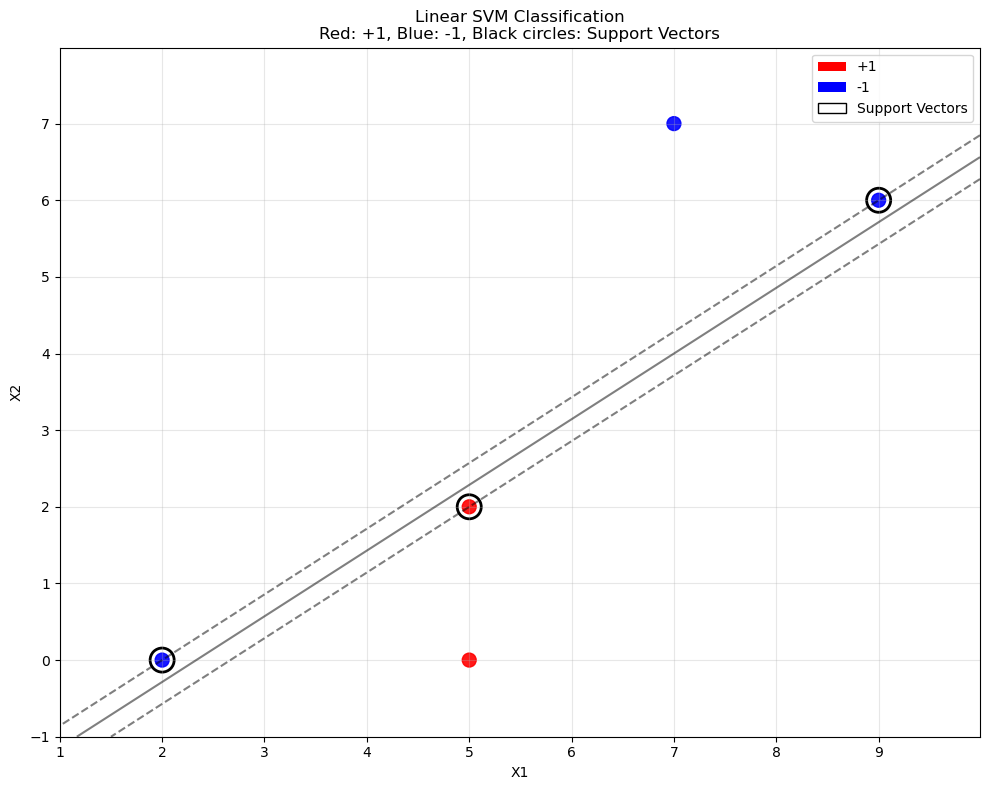

SVM Results:
Support vectors: [[9. 6.]
 [2. 0.]
 [5. 2.]]
Support vector indices: [3 4 1]
Coefficients (dual): [[-4.12376149 -6.49801838 10.62177987]]
Intercept: -6.9974
Weight vector w: [2.9990, -3.4990]
Decision boundary: 2.9990*x1 + -3.4990*x2 + -6.9974 = 0

Classification results:
Point [5 0]: True label =  1, Predicted =  1, Decision value =  7.998
Point [5 2]: True label =  1, Predicted =  1, Decision value =  1.000
Point [7 7]: True label = -1, Predicted = -1, Decision value = -10.497
Point [9 6]: True label = -1, Predicted = -1, Decision value = -1.000
Point [2 0]: True label = -1, Predicted = -1, Decision value = -0.999


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Define the data points and labels
X = np.array([[5, 0], [5, 2], [7, 7], [9, 6], [2, 0]])
y = np.array([1, 1, -1, -1, -1])

# Create and train the SVM classifier
clf = svm.SVC(kernel='linear', C=1000)  # High C for hard margin
clf.fit(X, y)

# Create a mesh to plot the decision boundary
h = 0.01  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary
plt.figure(figsize=(10, 8))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and margins
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Plot data points
colors = ['red' if label == 1 else 'blue' for label in y]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=100, alpha=0.9)

# Highlight support vectors
support_vectors = clf.support_vectors_
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], 
           s=300, facecolors='none', edgecolors='black', linewidth=2)

# Add labels and formatting
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Linear SVM Classification\nRed: +1, Blue: -1, Black circles: Support Vectors')
plt.grid(True, alpha=0.3)

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='red', label='+1'),
                   Patch(facecolor='blue', label='-1'),
                   Patch(facecolor='none', edgecolor='black', label='Support Vectors')]
plt.legend(handles=legend_elements)

plt.tight_layout()
plt.show()

# Print the SVM parameters
print("SVM Results:")
print(f"Support vectors: {clf.support_vectors_}")
print(f"Support vector indices: {clf.support_}")
print(f"Coefficients (dual): {clf.dual_coef_}")
print(f"Intercept: {clf.intercept_[0]:.4f}")

# Calculate and display the decision boundary equation
w = clf.coef_[0]
print(f"Weight vector w: [{w[0]:.4f}, {w[1]:.4f}]")
print(f"Decision boundary: {w[0]:.4f}*x1 + {w[1]:.4f}*x2 + {clf.intercept_[0]:.4f} = 0")

# Verify classification
print("\nClassification results:")
for i, (point, true_label) in enumerate(zip(X, y)):
    predicted = clf.predict([point])[0]
    decision_value = clf.decision_function([point])[0]
    print(f"Point {point}: True label = {true_label:2d}, "
          f"Predicted = {predicted:2d}, Decision value = {decision_value:6.3f}")